In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
file = 'https://raw.githubusercontent.com/Esther-Velasco/mid_term_project/main/wfp_market_food_prices.csv'
df = pd.read_csv(file, sep=',', encoding='latin-1')

# EDA

## Data Exploration

In [3]:
#checking for duplicates
df.duplicated().sum()

0

In [4]:
#finding the products names:
commodities = df['cm_name'].unique()
commodities.sort()
commodities

array(['Apples', 'Apples (red)', 'Avocados', 'Bananas',
       'Bananas (medium size)', 'Beans', 'Beans (black)',
       'Beans (butter)', 'Beans (catarino)', 'Beans (dry)',
       'Beans (fava, dry)', 'Beans (green, fresh)', 'Beans (haricot)',
       'Beans (kidney red)', 'Beans (kidney white)', 'Beans (kidney)',
       'Beans (magnum)', 'Beans (mung)', 'Beans (niebe)',
       'Beans (niebe, white)', 'Beans (red)', 'Beans (red, fresh)',
       'Beans (silk red)', 'Beans (string)', 'Beans (sugar) ',
       'Beans (sugar-red)', 'Beans (white)', 'Beans(mash)', 'Beetroots',
       'Blackberry', 'Bread', 'Bread (bakery)', 'Bread (brown)',
       'Bread (common)', 'Bread (first grade flour)',
       'Bread (high grade flour)', 'Bread (khoboz)', 'Bread (pita)',
       'Bread (rye)', 'Bread (shop)', 'Bread (wheat)', 'Broccoli',
       'Buckwheat grits', 'Bulgur', 'Butter', 'Cabbage', 'Carrots',
       'Cashew', 'Cassava', 'Cassava (chikwangue)', 'Cassava (cossette)',
       'Cassava (dry)', '

In [5]:
#finding the countries names:
countries = list(df['adm0_name'].unique())
countries

['Afghanistan',
 'Algeria',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Democratic Republic of the Congo',
 'Djibouti',
 'El Salvador',
 'Ethiopia',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea-Bissau',
 'Guinea',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iran  (Islamic Republic of)',
 'Iraq',
 'Jordan',
 'Kenya',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Rwanda',
 'Senegal',
 'Somalia',
 'Sri Lanka',
 'Swaziland',
 'Syrian Arab Republic',
 'Tajikistan',
 'Timor-Leste',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Republic of Tanzania',
 'Yemen',
 'Zambia',
 'Zimbabwe',
 'St

In [6]:
df['mp_year'].unique() #years are 1992-2017

array([2014, 2015, 2016, 2017, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2000, 2001, 2002, 1996, 1997, 1998, 1999,
       1992, 1993, 1994, 1995])

In [7]:
df.isna().sum()#checking for Null values

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name             13949
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource        0
dtype: int64

## Data Cleaning

In [8]:
#removing unnecessery columns
df.drop(columns=['mkt_id', 'mkt_name', 'adm1_id', 'adm1_name', 'mp_month', 'mp_commoditysource'],inplace = True)
df.head(1)

,adm0_id,adm0_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_year,mp_price
0,1,Afghanistan,55,Bread,87,AFN,15,Retail,5,KG,2014,50.0


In [9]:
#pd.isin - The result will only be True at a location if all the labels match.
mask = df['cm_name'].isin(['Transport (public)','Cotton','Charcoal', 'Fuel (gas)',
                           'Fuel (diesel)', 'Fuel (petrol-gasoline)', 'Fuel (kerosene)',
                           'Wage (qualified labour)', 'Wage (non-qualified labour, non-agricultural)',
                           'Wage (non-qualified labour)','Exchange rate (unofficial)','Exchange rate'])
df = df[~mask] #redefining the dataframe as the rows where the mask is False


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.reindex()

,adm0_id,adm0_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_year,mp_price
0,1,Afghanistan,55,Bread,87,AFN,15,Retail,5,KG,2014,50.00
12,1,Afghanistan,55,Bread,87,AFN,15,Retail,5,KG,2015,50.00
19,1,Afghanistan,55,Bread,87,AFN,15,Retail,5,KG,2015,56.25
20,1,Afghanistan,55,Bread,87,AFN,15,Retail,5,KG,2015,65.25
21,1,Afghanistan,55,Bread,87,AFN,15,Retail,5,KG,2015,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
743902,70001,South Sudan,156,Sesame,83,SSP,15,Retail,47,3.5 KG,2016,100.00
743903,70001,South Sudan,156,Sesame,83,SSP,15,Retail,47,3.5 KG,2016,121.00
743904,70001,South Sudan,156,Sesame,83,SSP,15,Retail,47,3.5 KG,2016,115.00
743906,70001,South Sudan,156,Sesame,83,SSP,15,Retail,47,3.5 KG,2017,425.00


##Data Transformation

In [12]:
re.split(r'[^\w]+','Rice_basmati (long grain)') #splitting the string into words

['Rice_basmati', 'long', 'grain', '']

In [13]:
#'sour cream' and 'sweet potato' are the only cases that break the pattern
df['cm_name'].replace(to_replace='Sweet potatoes', value='sweet_potatoes',inplace=True)
df['cm_name'].replace(to_replace='Sour cream', value='sour_cream',inplace=True)
df['cm_name'].replace(to_replace='Passion fruit', value='passion_fruit',inplace=True)

In [14]:
#Use regex to standardize the commodity names on type and
def split_type(commodity_):
  type_ = re.split(r'[^\w]+',commodity_)
  return type_[0].lower()

df['cm_name'] = df['cm_name'].apply(split_type)

In [15]:
types = df['cm_name'].unique()
types.sort()
types

array(['apples', 'avocados', 'bananas', 'beans', 'beetroots',
       'blackberry', 'bread', 'broccoli', 'buckwheat', 'bulgur', 'butter',
       'cabbage', 'carrots', 'cashew', 'cassava', 'cauliflower', 'cheese',
       'chickpeas', 'chili', 'cocoa', 'coffee', 'cornstarch', 'cowpeas',
       'cucumbers', 'curd', 'dates', 'eggplants', 'eggs', 'fat', 'fish',
       'fonio', 'gari', 'garlic', 'ghee', 'groundnuts', 'guava',
       'labaneh', 'lentils', 'lettuce', 'livestock', 'maize', 'mangoes',
       'meat', 'milk', 'millet', 'noodles', 'oil', 'onions', 'oranges',
       'papaya', 'parsley', 'passion_fruit', 'pasta', 'peanut', 'peas',
       'peppers', 'plantains', 'potatoes', 'poultry', 'pulses', 'pumpkin',
       'rice', 'salt', 'sesame', 'sorghum', 'sour_cream', 'soybeans',
       'spinach', 'sugar', 'sweet_potatoes', 'tamarillos', 'tea',
       'tomatoes', 'tortilla', 'water', 'wheat', 'yam', 'yogurt',
       'zucchini'], dtype=object)

### Merging Tables

In [16]:
#Upload exchange rate data
er_df= pd.read_csv("https://raw.githubusercontent.com/Esther-Velasco/mid_term_project/main/API_PA.NUS.FCRF_DS2_en_csv_v2_5996111.csv", sep=',',skiprows=3)

In [17]:
#drop years not needed:
er_df.drop(['Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '2018','2019', '2020', '2021',
        '2022','Unnamed: 67'], axis=1, inplace=True)

In [18]:
#To identify the country names that are written differently between dataframes:
#saving each unique in a list:
countries_official = list(df["adm0_name"].unique())

In [19]:
countries_to_change = list(er_df["Country Name"].unique())
countries_official, countries_to_change = [i for i in countries_official if i not in countries_to_change], [j for j in countries_to_change if j not in countries_official]
countries_official  #making an exception for "State of Palestine" to fill in the data

['Cape Verde',
 'Congo',
 'Democratic Republic of the Congo',
 'Gambia',
 'Iran  (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Swaziland',
 'Turkey',
 'United Republic of Tanzania',
 'Yemen',
 'State of Palestine',
 'Egypt']

In [20]:
#merging country names between dataframes:

countries_mapping = {
    'Cabo Verde': 'Cape Verde',
    'Congo, Rep.': 'Congo',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Gambia, The': 'Gambia',
    'Iran, Islamic Rep.': 'Iran  (Islamic Republic of)',
    'Kyrgyz Republic':'Kyrgyzstan',
    "Lao PDR":"Lao People's Democratic Republic",
    'Eswatini':'Swaziland',
    'Turkiye':'Turkey',
 'Tanzania':'United Republic of Tanzania',
 'Yemen, Rep.':'Yemen',
 'Egypt, Arab Rep.':'Egypt'
}

# Using the .replace() to replace values in the 'gender' column

er_df['Country Name'] = er_df['Country Name'].replace(countries_mapping)

#to check if changes were saved
er_df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Caribbean small states', 'Cuba',
       'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'A

In [21]:
#get only the countries that I have in the currency_dataframe
#pd.isin - The result will only be True at a location if all the labels match.
mask = er_df['Country Name'].isin(['Afghanistan', 'Algeria', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Benin', 'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti', 'El Salvador',
       'Ethiopia', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Guinea', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran  (Islamic Republic of)', 'Iraq', 'Jordan',
       'Kenya', 'Kyrgyzstan', "Lao People's Democratic Republic",
       'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
       'Somalia', 'Sri Lanka', 'Swaziland', 'Syrian Arab Republic',
       'Tajikistan', 'Timor-Leste', 'Turkey', 'Uganda', 'Ukraine',
       'United Republic of Tanzania', 'Yemen', 'Zambia', 'Zimbabwe',
       'State of Palestine', 'Sudan', 'Egypt', 'South Sudan'])
er_df = er_df[mask]

In [22]:
#now we join the two df!!!!
dfp= pd.merge(df, er_df, left_on='adm0_name', right_on='Country Name')
dfp.columns

Index(['adm0_id', 'adm0_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name',
       'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_year', 'mp_price',
       'Country Name', 'Country Code', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [23]:
dfp.drop(['Country Name','Country Code'],axis=1, inplace=True)

In [24]:
#Nicer names for our columns in our merged dfp
dfp.rename(columns= {"adm0_id": "country_id",
                     "adm0_name":"country_name",
                     "cm_id":"commodity_id",
                     "cm_name":"commodity_name",
                     "cur_id":"currency_id",
                     "cur_name": "currency_name",
                     "pt_id": "market_id",
                     "pt_name": "market_type",
                     "um_id": "unit_id",
                     "um_name":"unit_name",
                     "mp_year": "year",
                     'mp_price': "price_local",
                     "1992": "1992_xe",
                     "1993":"1993_xe",
                     "1994":"1994_xe",
                     "1995":"1995_xe",
                     "1996":"1996_xe",
                     "1997":"1997_xe",
                     "1998":"1998_xe",
                     "1999":"1999_xe",
                     "2000":"2000_xe",
                     "2001":"2001_xe",
                     "2002":"2002_xe",
                     "2003":"2003_xe",
                     "2004":"2004_xe",
                     "2005":"2005_xe",
                     "2006":"2006_xe",
                     "2007":"2007_xe",
                     "2008":"2008_xe",
                     "2009":"2009_xe",
                     "2010":"2010_xe",
                     "2011":"2011_xe",
                     "2012":"2012_xe",
                     "2013":"2013_xe",
                     "2014":"2014_xe",
                     "2015":"2015_xe",
                     "2016":"2016_xe",
                     "2017":"2017_xe"}, inplace=True)
dfp

,country_id,country_name,commodity_id,commodity_name,currency_id,currency_name,market_id,market_type,unit_id,unit_name,...,2008_xe,2009_xe,2010_xe,2011_xe,2012_xe,2013_xe,2014_xe,2015_xe,2016_xe,2017_xe
0,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.249615,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904
1,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.249615,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904
2,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.249615,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904
3,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.249615,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904
4,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.249615,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365617,70001,South Sudan,156,sesame,83,SSP,15,Retail,47,3.5 KG,...,NaN,NaN,NaN,2.988950,2.9500,2.9500,2.9500,3.604167,46.729167,113.647500
365618,70001,South Sudan,156,sesame,83,SSP,15,Retail,47,3.5 KG,...,NaN,NaN,NaN,2.988950,2.9500,2.9500,2.9500,3.604167,46.729167,113.647500
365619,70001,South Sudan,156,sesame,83,SSP,15,Retail,47,3.5 KG,...,NaN,NaN,NaN,2.988950,2.9500,2.9500,2.9500,3.604167,46.729167,113.647500
365620,70001,South Sudan,156,sesame,83,SSP,15,Retail,47,3.5 KG,...,NaN,NaN,NaN,2.988950,2.9500,2.9500,2.9500,3.604167,46.729167,113.647500


# Analysis

## Grouping and aggregation

### conversion from local currencies to USD

In [25]:
#converting from local currencies to USD for clearer scale

def convert_to_usd(index,local_price,year):
  year_xe = str(year)+'_xe' #jury rigging
  xe = dfp.loc[index,year_xe]
  price_usd = round(local_price / xe,2)
  return price_usd

#dfp["price_usd"] = dfp.apply(lambda x: convert_to_usd(index=x,local_price=dfp[x]['price_local'],year=dfp[x]['year']))
dfp['price_usd'] = dfp.index.to_series().apply(lambda x : convert_to_usd(index=x,local_price=dfp.iloc[x,11],year=dfp.iloc[x,10]))
dfp.head()

,country_id,country_name,commodity_id,commodity_name,currency_id,currency_name,market_id,market_type,unit_id,unit_name,...,2009_xe,2010_xe,2011_xe,2012_xe,2013_xe,2014_xe,2015_xe,2016_xe,2017_xe,price_usd
0,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904,0.87
1,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904,0.82
2,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904,0.92
3,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904,1.07
4,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,...,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904,0.91


In [26]:
#dropping exchange rates columns
dfp.drop(columns=['1992_xe','1993_xe','1994_xe','1995_xe','1996_xe','1997_xe','1998_xe','1999_xe',
                  '2000_xe','2001_xe','2002_xe','2003_xe','2004_xe','2005_xe','2006_xe','2007_xe',
                  '2008_xe','2009_xe','2010_xe','2011_xe','2012_xe','2013_xe','2014_xe','2015_xe',
                  '2016_xe','2017_xe',],inplace=True)

### Dealing with outliers


In [27]:
#drop livestock to see impact
# create a Boolean mask for the rows to remove
mask = dfp['commodity_name'] == 'livestock'

# select all rows except the ones that contain 'livestock'
dfp = dfp[~mask]

In [28]:
#removing weird units
mask = dfp['unit_name'].isin(['KG','L'])
dfp = dfp[mask]

In [29]:
# First, calculate IQR for column Height
Q1 = dfp['price_usd'].quantile(0.25)
Q3 = dfp['price_usd'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = dfp[(dfp['price_usd'] < Q1 - threshold * IQR) | (dfp['price_usd'] > Q3 + threshold * IQR)]
outliers


,country_id,country_name,commodity_id,commodity_name,currency_id,currency_name,market_id,market_type,unit_id,unit_name,year,price_local,price_usd
1769,4,Algeria,94,meat,91,DZD,15,Retail,5,KG,2015,298.00,2.96
1770,4,Algeria,94,meat,91,DZD,15,Retail,5,KG,2015,295.00,2.93
1771,4,Algeria,94,meat,91,DZD,15,Retail,5,KG,2015,360.00,3.58
1772,4,Algeria,94,meat,91,DZD,15,Retail,5,KG,2015,330.00,3.28
1773,4,Algeria,94,meat,91,DZD,15,Retail,5,KG,2015,290.00,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365574,70001,South Sudan,96,oil,83,SSP,15,Retail,15,L,2014,8.75,2.97
365575,70001,South Sudan,96,oil,83,SSP,15,Retail,15,L,2014,10.20,3.46
365576,70001,South Sudan,96,oil,83,SSP,15,Retail,15,L,2015,26.50,7.35
365577,70001,South Sudan,96,oil,83,SSP,15,Retail,15,L,2015,31.50,8.74


### Grouping by the five Food Groups
- Fruit and vegetables.
- Starchy food.
- Dairy.
- Protein.
- Fat.

In [30]:
# food groups + 'other'

fg = ['fruit and vegetables',
              'starchy food',
              'dairy',
              'protein',
              'fat',
              'other']

#commodities list

commodities_categories = [['apples',fg[1]], ['avocados',fg[4]], ['bananas',fg[0]], ['beans',fg[3]], ['beetroots',fg[0]],
       ['blackberry',fg[0]], ['bread',fg[1]], ['broccoli',fg[0]], ['buckwheat',fg[1]], ['bulgur',fg[1]], ['butter',fg[2]],
       ['cabbage',fg[0]], ['carrots',fg[0]], ['cashew',fg[3]], ['cassava',fg[1]], ['cauliflower',fg[0]], ['cheese',fg[2]],
       ['chickpeas',fg[3]], ['chili',fg[0]], ['cocoa',fg[0]], ['coffee',fg[5]], ['cornstarch',fg[1]], ['cowpeas',fg[3]],
       ['cucumbers',fg[0]], ['curd',fg[2]], ['dates',fg[0]], ['eggplants',fg[0]], ['eggs',fg[3]], ['fat',fg[4]], ['fish',fg[3]],
       ['fonio',fg[1]], ['gari',fg[1]], ['garlic',fg[0]], ['ghee',fg[4]], ['groundnuts',fg[3]], ['guava',fg[0]],
       ['labaneh',fg[2]], ['lentils',fg[3]], ['lettuce',fg[0]], ['livestock',fg[5]], ['maize',fg[1]], ['mangoes',fg[0]],
       ['meat',fg[3]], ['milk',fg[2]], ['millet',fg[1]], ['noodles',fg[1]], ['oil',fg[4]], ['onions',fg[0]], ['oranges',fg[0]],
       ['papaya',fg[0]], ['parsley',fg[0]], ['passion_fruit',fg[0]], ['pasta',fg[1]], ['peanut',fg[3]], ['peas',fg[3]],
       ['peppers',fg[0]], ['plantains',fg[0]], ['potatoes',fg[1]], ['poultry',fg[3]], ['pulses',fg[3]], ['pumpkin',fg[0]],
       ['rice',fg[1]], ['salt',fg[5]], ['sesame',fg[3]], ['sorghum',fg[1]], ['sour_cream',fg[2]], ['soybeans',fg[3]],
       ['spinach',fg[0]], ['sugar',fg[5]], ['sweet_potatoes',fg[1]], ['tamarillos',fg[0]], ['tea',fg[5]],
       ['tomatoes',fg[0]], ['tortilla',fg[1]], ['water',fg[5]], ['wheat',fg[1]], ['yam',fg[1]], ['yogurt',fg[2]],
       ['zucchini',fg[0]]] #commodities list

food_categories = pd.DataFrame(commodities_categories,columns=['commodity_name','food_group'])
food_categories

,commodity_name,food_group
0,apples,starchy food
1,avocados,fat
2,bananas,fruit and vegetables
3,beans,protein
4,beetroots,fruit and vegetables
...,...,...
74,water,other
75,wheat,starchy food
76,yam,starchy food
77,yogurt,dairy


In [31]:
#merging the data frames
dfp = pd.merge(dfp, food_categories, on='commodity_name')

### Grouping by region

- central_asia
- north_africa
- sub_saharan_africa
- latin_america
- south_asia
- eastern_europe

In [32]:
#create a df containing a dictionary with key (=region), values (=country name):
df_countries = pd.DataFrame({'country_name' :['Afghanistan', 'Algeria', 'Armenia',
                                              'Azerbaijan', 'Bangladesh','Benin',
                                              'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi',
                                              'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
                                              'Chad', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
                                              'Democratic Republic of the Congo', 'Djibouti', 'El Salvador',
                                              'Ethiopia', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
                                              'Guinea-Bissau', 'Guinea', 'Haiti', 'Honduras', 'India',
                                              'Indonesia', 'Iran  (Islamic Republic of)', 'Iraq', 'Jordan',
                                              'Kenya', 'Kyrgyzstan', "Lao People's Democratic Republic",
                                              'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali'
                                              'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria',
                                              'Pakistan', 'Panama', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
                                              'Somalia', 'Sri Lanka', 'Swaziland', 'Syrian Arab Republic',
                                              'Tajikistan', 'Timor-Leste', 'Turkey', 'Uganda', 'Ukraine',
                                              'United Republic of Tanzania', 'Yemen', 'Zambia', 'Zimbabwe',
                                              'Sudan', 'Egypt', 'South Sudan'],
                             'region':['central_asia', 'north_africa', 'central_asia',
                                              'central_asia', 'central_asia','sub_saharan_africa',
                                              'central_asia', 'latin_america', 'sub_saharan_africa', 'sub_saharan_africa',
                                              'south_asia', 'sub_saharan_africa', 'sub_saharan_africa', 'sub_saharan_africa',
                                              'sub_saharan_africa', 'latin_america', 'sub_saharan_africa', 'latin_america', "sub_saharan_africa",
                                              'sub_saharan_africa', 'sub_saharan_africa', 'latin_america',
                                              'sub_saharan_africa', 'sub_saharan_africa', 'central_asia', 'sub_saharan_africa', 'latin_america',
                                              'sub_saharan_africa', 'sub_saharan_africa', 'latin_america', 'latin_america', 'central_asia',
                                              'south_asia', 'middle_east', 'middle_east', 'middle_east',
                                              'sub_saharan_africa', 'central_asia', "south_asia",
                                              'middle_east', 'sub_saharan_africa', 'sub_saharan_africa', 'sub_saharan_africa', 'sub_saharan_africa', 'sub_saharan_africa'
                                              'sub_saharan_africa', 'sub_saharan_africa', 'south_asia', 'central_asia', 'sub_saharan_africa', 'sub_saharan_africa',
                                              'central_asia', 'latin_america', 'latin_america', 'south_asia', 'sub_saharan_africa', 'sub_saharan_africa',
                                              'sub_saharan_africa', 'central_asia', 'sub_saharan_africa', 'middle_east',
                                              'central_asia', 'south_asia', 'eastern_europe', 'sub_saharan_africa', 'eastern_europe',
                                              'sub_saharan_africa', 'middle_east', 'sub_saharan_africa', 'sub_saharan_africa',
                                              'sub_saharan_africa', 'north_africa', 'sub_saharan_africa']})

#merging all in the dfp
dfp = pd.merge(dfp, df_countries, on='country_name')

In [33]:
dfp.head()

,country_id,country_name,commodity_id,commodity_name,currency_id,currency_name,market_id,market_type,unit_id,unit_name,year,price_local,price_usd,food_group,region
0,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,2014,50.00,0.87,starchy food,central_asia
1,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,2015,50.00,0.82,starchy food,central_asia
2,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,2015,56.25,0.92,starchy food,central_asia
3,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,2015,65.25,1.07,starchy food,central_asia
4,1,Afghanistan,55,bread,87,AFN,15,Retail,5,KG,2015,55.50,0.91,starchy food,central_asia


In [34]:
#download csv
dfp.to_csv("food_prices_final.csv")

# Visualizations

In [35]:
#droping high prices to focus on the lower income
dfp.drop(dfp[dfp['price_usd']>5].index,inplace=True)

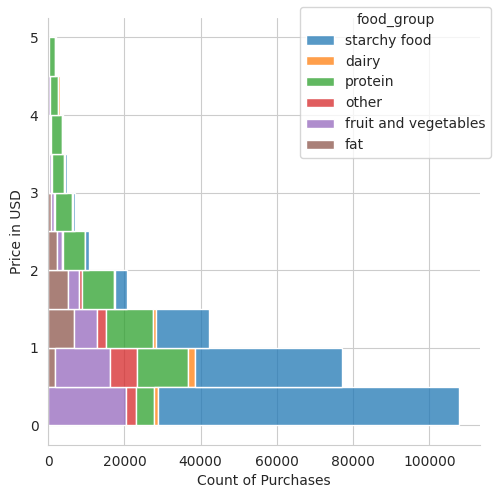

In [54]:
sns.set_style('whitegrid')
sns.set_palette("tab10")
g = sns.displot(dfp, y = 'price_usd', binwidth = 0.5,hue='food_group',multiple ='stack', facet_kws=dict(legend_out=False))
g.set_axis_labels('Count of Purchases','Price in USD')
sns.move_legend(g,'upper right',)

<Axes: xlabel='year', ylabel='price_usd'>

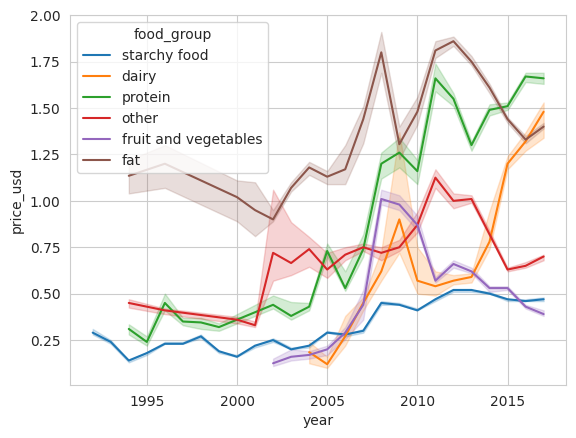

In [38]:
sns.set_style('whitegrid')
sns.color_palette("tab10")
sns.lineplot(dfp, x='year', y='price_usd', hue='food_group',estimator='median')

In [60]:
import seaborn.objects as so
from seaborn import plotting_context
from matplotlib import style
from seaborn import axes_style

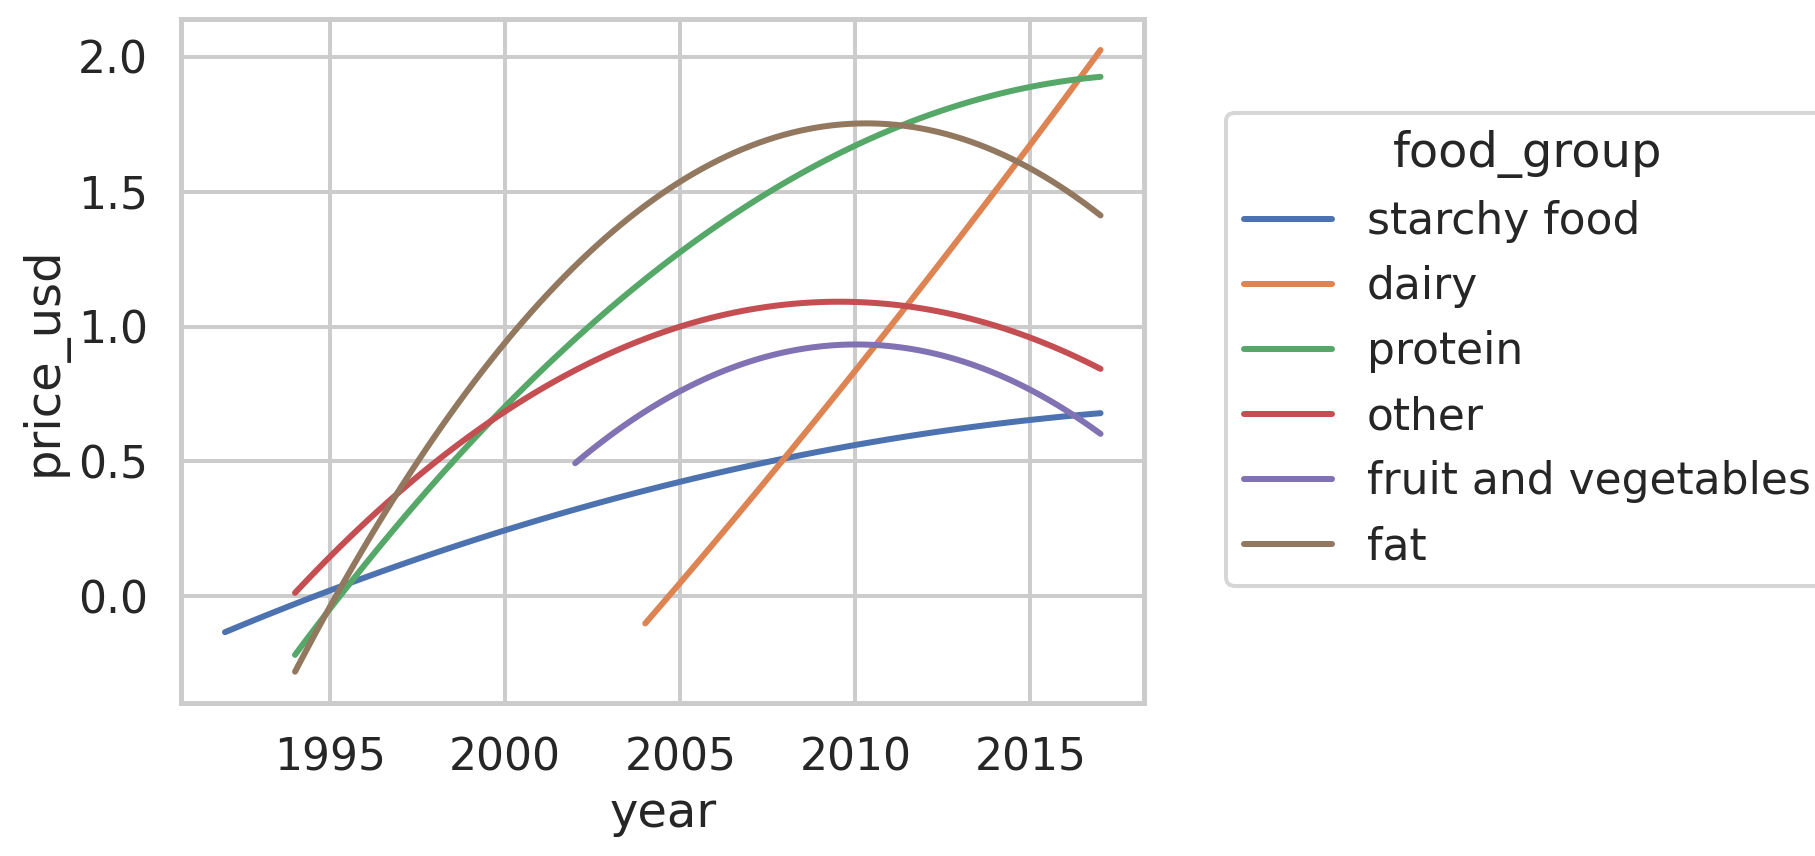

In [61]:

p = (so.Plot(dfp,x='year',y='price_usd', color='food_group').add(so.Line(), so.PolyFit()))
p.theme(axes_style("whitegrid") | plotting_context("talk"))